# Heating network with for heat comsumers (pandapipes Version 0.9.0)

In [296]:
import pandapipes as pp

# create empty net
net = pp.create_empty_network(fluid ="water")

In [297]:
j11 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 11")
j00 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 00")

In [298]:
j1 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 1")
j2 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 2")
j3 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 3")
j4 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 4")
j5 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 5")
j6 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 6")
j7 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 7")
j0 = pp.create_junction(net, pn_bar=5, tfluid_k=293.15, name="junction 0")

In [299]:
pp.create_circ_pump_const_pressure(net, return_junction=j00, flow_junction=j11, p_flow_bar=5, plift_bar=0.7, t_flow_k=273.15+80)

0

In [300]:
# 1. Heat consumer
pp.create_heat_consumer(net,from_junction=j1, to_junction=j0, diameter_m=200e-3, controlled_mdot_kg_per_s=5, qext_w =100000)

# 2. Heat consumer
pp.create_heat_consumer(net,from_junction=j2, to_junction=j7, diameter_m=200e-3, controlled_mdot_kg_per_s=5, qext_w =100000)

# 3. Heat consumer 
pp.create_heat_consumer(net,from_junction=j3, to_junction=j6, diameter_m=200e-3,treturn_k=363.15, qext_w =100000)

# 4. Heat consumer 
pp.create_heat_consumer(net,from_junction=j4, to_junction=j5, diameter_m=200e-3, treturn_k=363.15, qext_w =100000)

3

In [301]:
# from pump "flow" to first consumer
pp.create_pipe_from_parameters(net, from_junction=j11, to_junction=j1, length_km=1,              
                              diameter_m=200e-3, k_mm=.1, alpha_w_per_m2k=5, sections = 5, text_k=283)

# from 1. consumer to 2.consumer "flow"
pp.create_pipe_from_parameters(net, from_junction=j1, to_junction=j2, length_km=1,
                              diameter_m=200e-3, k_mm=.1, alpha_w_per_m2k=5, sections = 5, text_k=283)

# from 2. consumer to 3.consumer "flow"
pp.create_pipe_from_parameters(net, from_junction=j2, to_junction=j3, length_km=1,
                               diameter_m=200e-3, k_mm=.1, alpha_w_per_m2k=5, sections = 5, text_k=283)

# from 3. consumer to 4.consumer "flow"
pp.create_pipe_from_parameters(net, from_junction=j3, to_junction=j4, length_km=1,
                              diameter_m=200e-3, k_mm=.1, alpha_w_per_m2k=5, sections = 5, text_k=283)

# from 4. consumer to 3.consumer "return flow"
pp.create_pipe_from_parameters(net, from_junction=j5, to_junction=j6, length_km=1,
                              diameter_m=200e-3, k_mm=.1, alpha_w_per_m2k=5, sections = 5, text_k=283)

# from 3. consumer to 2.consumer "return flow"
pp.create_pipe_from_parameters(net, from_junction=j6, to_junction=j7, length_km=1,
                               diameter_m=200e-3, k_mm=.1, alpha_w_per_m2k=5, sections = 5, text_k=283)

# from 2.consumer to 1.consumer "return flow"
pp.create_pipe_from_parameters(net, from_junction=j7, to_junction=j0, length_km=1,
                               diameter_m=200e-3, k_mm=.1, alpha_w_per_m2k=5, sections = 5, text_k=283)

# from 1.consumer to pump return flow
pp.create_pipe_from_parameters(net, from_junction=j0, to_junction=j00, length_km=1,             
                              diameter_m=200e-3, k_mm=.1, alpha_w_per_m2k=5, sections = 5, text_k=283)

7

In [308]:
import time
start_seq = time.time() 
pp.pipeflow(net, mode='sequential')
end_seq = time.time()
time_seq=end_seq-start_seq

In [ ]:
net.res_junction 

In [ ]:
net.res_pipe

In [309]:
net.res_junction_seq = net.res_junction.copy()
net.res_pipe_seq = net.res_pipe.copy()

In [310]:
start_bi = time.time() 
pp.pipeflow(net, max_iter_bidirect=100, mode='bidirectional')
end_bi = time.time()
time_bi=end_bi-start_bi

In [ ]:
net.res_junction 

In [ ]:
net.res_pipe

In [311]:
net.res_junction_bi = net.res_junction.copy()
net.res_pipe_bi = net.res_pipe.copy()

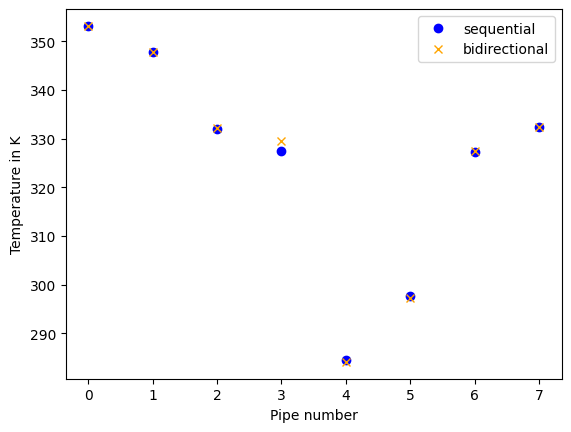

In [312]:
import matplotlib.pyplot as plt
plt.plot(net.res_pipe_seq.t_from_k, color='blue', marker='o',label='sequential',linestyle='None')
plt.plot(net.res_pipe_bi.t_from_k, color = 'orange', marker='x',label='bidirectional',linestyle='None')
plt.xlabel('Pipe number')
plt.ylabel('Temperature in K')
plt.legend()
plt.show()

In [ ]:
plt.plot(net.res_pipe_seq.mdot_from_kg_per_s,color='blue', marker='o',label='sequential',linestyle='None')
plt.plot(net.res_pipe_bi.mdot_from_kg_per_s, color = 'orange', marker='x',label='bidirectional',linestyle='None')
plt.xlabel('Pipe number')
plt.ylabel('Mass flow in kg/s')
plt.legend()
plt.show()

In [313]:
# Temperatur output
import pandas as pd
Diff_t_from=abs(net.res_pipe_seq.t_from_k-net.res_pipe_bi.t_from_k)
Diff_t_from_percent=abs(net.res_pipe_seq.t_from_k-net.res_pipe_bi.t_from_k)/net.res_pipe_seq.t_from_k*100
# Massflow
Diff_mass=abs(net.res_pipe_seq.mdot_from_kg_per_s-net.res_pipe_bi.mdot_from_kg_per_s)
Diff_mass_percent=abs(net.res_pipe_seq.mdot_from_kg_per_s-net.res_pipe_bi.mdot_from_kg_per_s)/abs(net.res_pipe_seq.mdot_from_kg_per_s)*100

diff_tab =pd.DataFrame({'Diff_t_from':Diff_t_from,
                        'Diff_t_from_in_percent':Diff_t_from_percent,
                        'Diff_mass':Diff_mass,
                        'Diff_mass_in_percent':Diff_mass_percent,
                        'time_seq':time_seq,
                        'time_bi':time_bi})
print(diff_tab)

   Diff_t_from  Diff_t_from_in_percent  Diff_mass  Diff_mass_in_percent  \
0     0.000000                0.000000   0.017405              0.186807   
1     0.009707                0.002791   0.017405              0.403168   
2     0.217888                0.065632   0.017405              2.548372   
3     2.234560                0.682596   0.038830             11.370867   
4     0.432291                0.151910   0.038830             11.370867   
5     0.350282                0.117685   0.017405              2.548372   
6     0.217977                0.066618   0.017405              0.403168   
7     0.079587                0.023944   0.017405              0.186807   

   time_seq   time_bi  
0  0.013051  0.024827  
1  0.013051  0.024827  
2  0.013051  0.024827  
3  0.013051  0.024827  
4  0.013051  0.024827  
5  0.013051  0.024827  
6  0.013051  0.024827  
7  0.013051  0.024827  


In [ ]:
net._internal_results